<a href="https://colab.research.google.com/github/kasaderos/timeseries/blob/master/Local_approximation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

def local_approximation_la0(series, window_size, forecast_horizon, num_neighbors=5):
    """
    Local Approximation (LA0) algorithm for time series forecasting using estimated growth rates.

    Parameters:
    - series: The time series data (1D numpy array).
    - window_size: The size of the sliding window (length of subsequences).
    - forecast_horizon: The number of steps to forecast into the future.
    - num_neighbors: The number of nearest neighbors to consider for approximation.

    Returns:
    - forecast: The forecasted values (1D numpy array).
    """
    series = series.tolist()  # Convert to list for easier appending
    forecast = []

    for _ in range(forecast_horizon):
        n = len(series)
        subsequences = np.array([series[i:i+window_size] for i in range(n - window_size)])
        current_subsequence = np.array(series[-window_size:])

        if len(subsequences) == 0:
            break  # Prevent issues if the series is too short

        # Compute distances and find nearest neighbors
        distances = euclidean_distances([current_subsequence], subsequences).flatten()
        nearest_indices = np.argsort(distances)[:num_neighbors]

        print(distances[nearest_indices])
        # Calculate estimated growth rates from neighbors
        growth_rates = []
        for idx in nearest_indices:
            p1 = series[idx + window_size - 1 ]  # The "next" segment after the window
            p2 = series[idx + window_size]  # The step-ahead values

            growth_rates.append(p2/p1-1)

        if growth_rates:
            estimated_growth = np.mean(growth_rates)  # Average growth from all selected pairs
            next_value = series[-1] * (1 + estimated_growth)  # Apply growth rate
        else:
            next_value = series[-1]  # Default to last known value if no neighbors found

        forecast.append(next_value)
        series.append(next_value)  # Append forecasted value for iterative updates

    return np.array(forecast)


In [14]:
import pandas as pd

df = pd.read_csv('sample_data/aapl.csv')


In [22]:
series = df['Close'].to_numpy()

window_size = 14
forecast_horizon = 14
num_neighbors = 5

forecast = local_approximation_la0(series, window_size, forecast_horizon, num_neighbors)
print("Forecasted values:", forecast)


Forecasted values: [225.82636037 226.35321903 224.36384991 222.86148629 220.88331863
 219.81078349 219.45219663 219.44012419 219.73730773 220.16610435
 220.79017915 219.74331146 216.41743116 216.55248749]


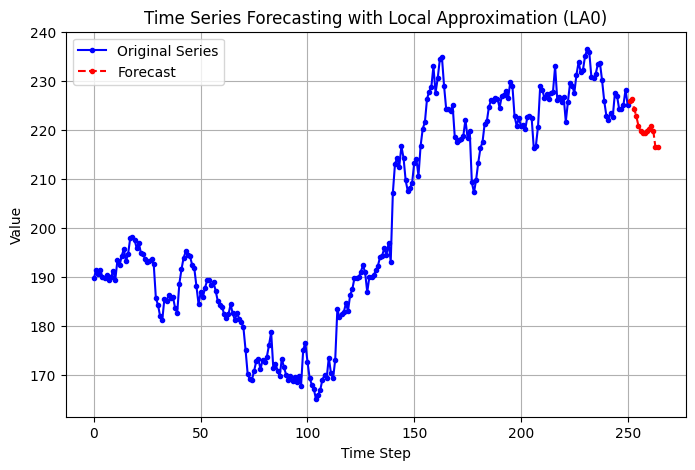

In [23]:
import matplotlib.pyplot as plt

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(range(len(series)), series, label="Original Series", marker=".", linestyle="-", color="blue")
plt.plot(range(len(series), len(series) + forecast_horizon), forecast, label="Forecast", marker=".", linestyle="--", color="red")

plt.xlabel("Time Step")
plt.ylabel("Value")
plt.title("Time Series Forecasting with Local Approximation (LA0)")
plt.legend()
plt.grid(True)
plt.show()

In [32]:
train_len = 200

series = df['Close'].to_numpy()[:train_len]

window_size = 5
forecast_horizon = 30
test_len = forecast_horizon
num_neighbors = 5

forecast = local_approximation_la0(series, window_size, forecast_horizon, num_neighbors)
print("Forecasted values:", forecast)


[6.46307976 6.55904719 7.50695011 8.24748446 8.54823374]
[4.96949807 6.746921   7.42747738 8.505024   8.78091823]
[5.61498146 6.38733654 6.73638255 6.77258402 6.79412868]
[3.52813517 5.33902314 5.5988576  5.74929425 6.14315804]
[3.79983949 4.65304501 4.80038802 6.03285684 6.10720577]
[3.54132844 4.90360772 5.01765343 6.28216757 6.74804441]
[3.53958736 4.98109791 5.07678803 6.63882606 7.55767488]
[3.47572772 3.90547144 6.59159501 6.83358768 7.18127367]
[2.59564657 4.10903328 5.75813844 5.77950816 6.44707781]
[1.31616673 3.40927456 4.4955618  5.63755312 6.19045314]
[1.1639634  1.86774704 3.19482567 4.60372322 5.60975896]
[1.30268952 1.53615039 1.8479396  2.21275718 4.23980781]
[0.66823592 1.24008198 1.7961817  2.01082118 2.01860378]
[0.73750211 1.13811683 1.222287   1.89194179 1.89979798]
[0.90757686 1.27339167 1.5179883  1.72982671 1.80737143]
[0.87319701 1.45219347 1.73406684 1.80295213 1.83131996]
[0.6204423  1.41466808 1.77991034 1.82366985 1.8316373 ]
[0.18388757 0.7079742  1.494008

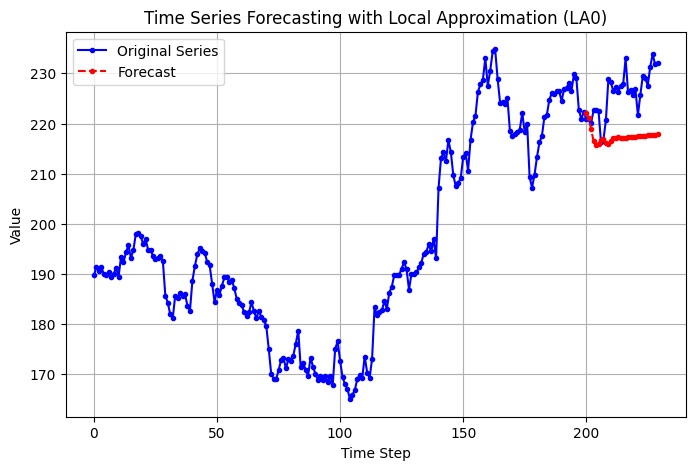

In [33]:
import matplotlib.pyplot as plt

# Plot results
plt.figure(figsize=(8, 5))
original =  df['Close'].to_numpy()[:train_len+test_len]
plt.plot(range(len(original)), original, label="Original Series", marker=".", linestyle="-", color="blue")
plt.plot(range(len(series), len(series) + forecast_horizon), forecast, label="Forecast", marker=".", linestyle="--", color="red")

plt.xlabel("Time Step")
plt.ylabel("Value")
plt.title("Time Series Forecasting with Local Approximation (LA0)")
plt.legend()
plt.grid(True)
plt.show()